In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from models.dataloader import DataLoader

In [2]:
train_loader = DataLoader(64, train=False, noise=True, flip=True)

nothing 127
landing 239
takeoff 92
2 92
3 99
4 92
5 92


In [3]:
x, y = next(train_loader.next_batch())

In [4]:
x0 = x[0]
x0 = x0*256 + 128
x0.max(), x0.min()

(255.0, 26.501304626464844)

In [5]:
x0 = x0.astype(np.uint8)
x0 = np.transpose(x0, (1, 2, 0))

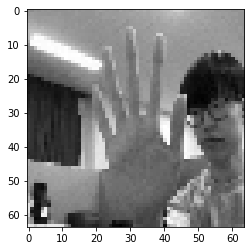

6.0


In [6]:
plt.imshow(x0.squeeze(), cmap="gray")
plt.show()
print(y[0])

In [113]:
x = x*128 + 128
print(x.max(), x.min())
x = x.astype(np.uint8)

x = np.transpose(x, (0, 2, 3, 1))

print(x.shape)
print(x.max(), x.min())

255.0 0.0
(64, 128, 128, 3)
255 0


0.0 0.0 2.0 6.0 1.0 1.0 6.0 2.0 3.0 6.0 3.0 1.0 4.0 6.0 3.0 1.0 


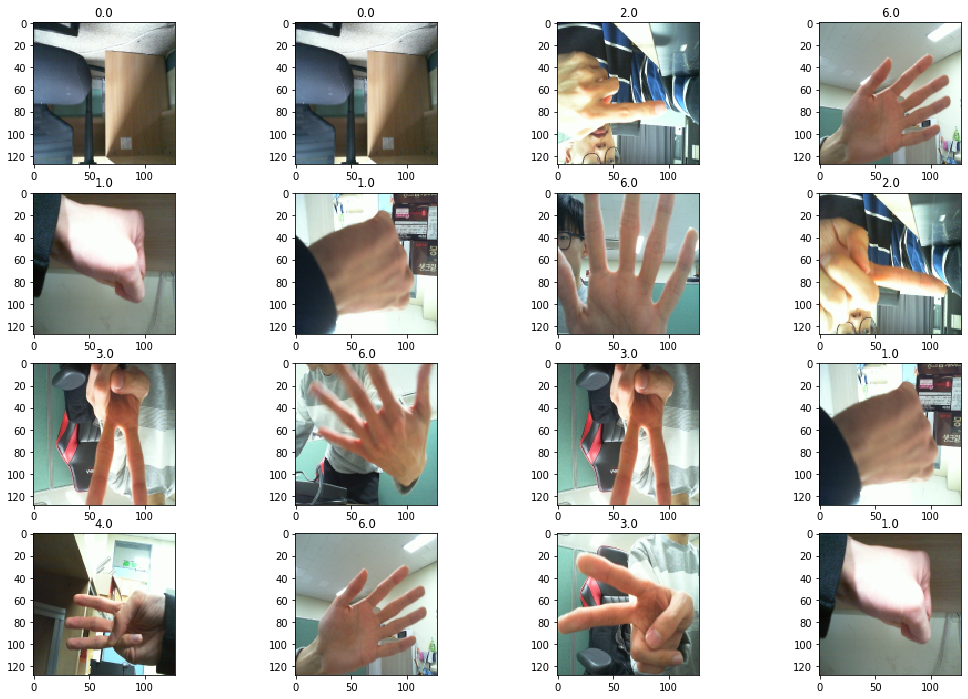

In [116]:

plt.figure(figsize=(18, 12))

for i in range(16):
    r = np.random.randint(20)
    
    plt.subplot(4, 4, i+1)
    plt.title(str(y[r]))
    plt.imshow(x[r])
    print(y[r], end=" ")

print()
    
plt.show()

In [5]:
x0 = x[0]
x0 = np.transpose(x0, (1, 2, 0))

In [9]:
x0.shape

(128, 128, 3)

In [10]:
x0 = x0*128 + 128
x0 = x0.astype(np.uint8)

In [12]:
x0.max(), x0.min()

(255, 10)

In [11]:
x0_hsv = cv2.cvtColor(x0, cv2.COLOR_RGB2HSV)

In [107]:
min_lim = (0, 20, 10)
max_lim = (50, 200, 255)

x0_mask = cv2.inRange(x0_hsv, min_lim, max_lim)

In [108]:
x0_mask.shape

(128, 128)

In [109]:
x0_skin = x0 * x0_mask.reshape(128, 128, 1)

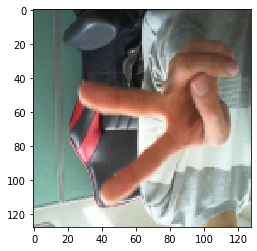

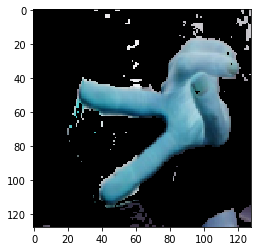

In [110]:
plt.imshow(x0)
plt.show()
plt.imshow(x0_skin)
plt.show()

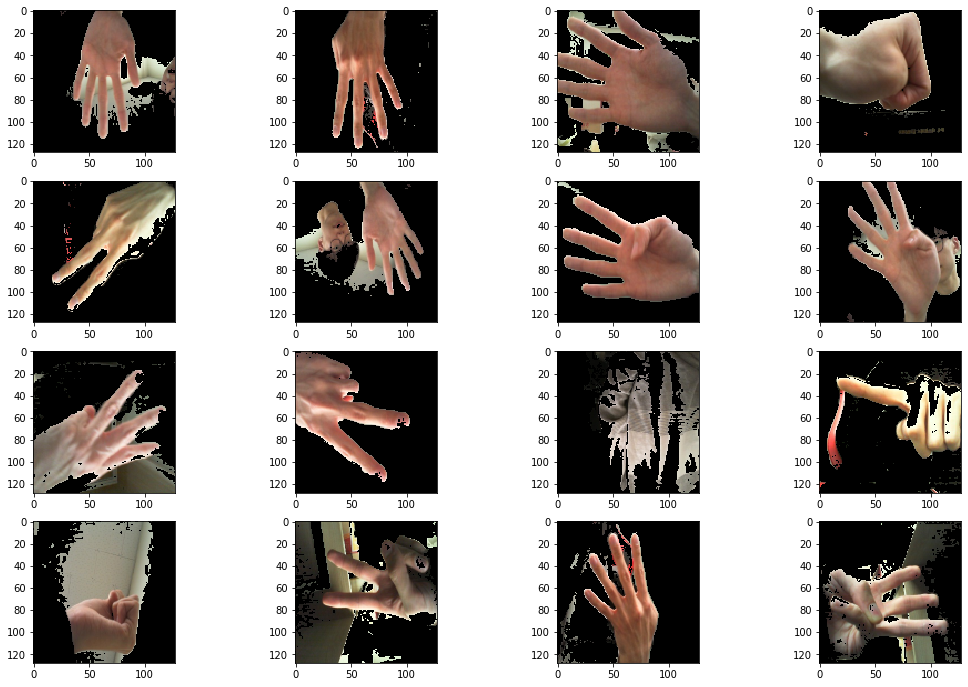

In [128]:
min_lim = (0, 20, 10)
max_lim = (50, 200, 255)

plt.figure(figsize=(18, 12))

cnt = 1
for i in np.random.randint(0, 64, size=(16)):
    img = x[i]
    img = np.transpose(img, (1, 2, 0))
    img = img*128 + 128
    img = img.astype(np.uint8)
    
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    img_skin_mask = cv2.inRange(img_hsv, min_lim, max_lim)
    img_skin_mask = np.stack([img_skin_mask, img_skin_mask, img_skin_mask], axis=-1)
    
    img_skin = cv2.bitwise_and(img, img_skin_mask)
    
    plt.subplot(4, 4, cnt)
    plt.imshow(img_skin)
    cnt += 1

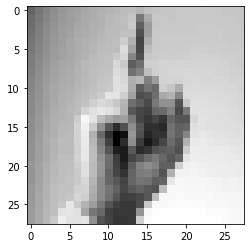

In [24]:
plt.imshow(x_train[0], cmap="gray")
plt.show()

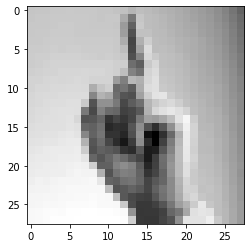

In [25]:
plt.imshow(x_train[0, :, ::-1], cmap="gray")
plt.show()

In [29]:

_train_set = train_dat[(train_dat.iloc[:, 0] == 0) | (train_dat.iloc[:, 0] == 3) | (train_dat.iloc[:, 0] == 21) | (train_dat.iloc[:, 0] == 22)]

3
21
3
0
3
0
22
22
21
22
21
3
0
0
3
3


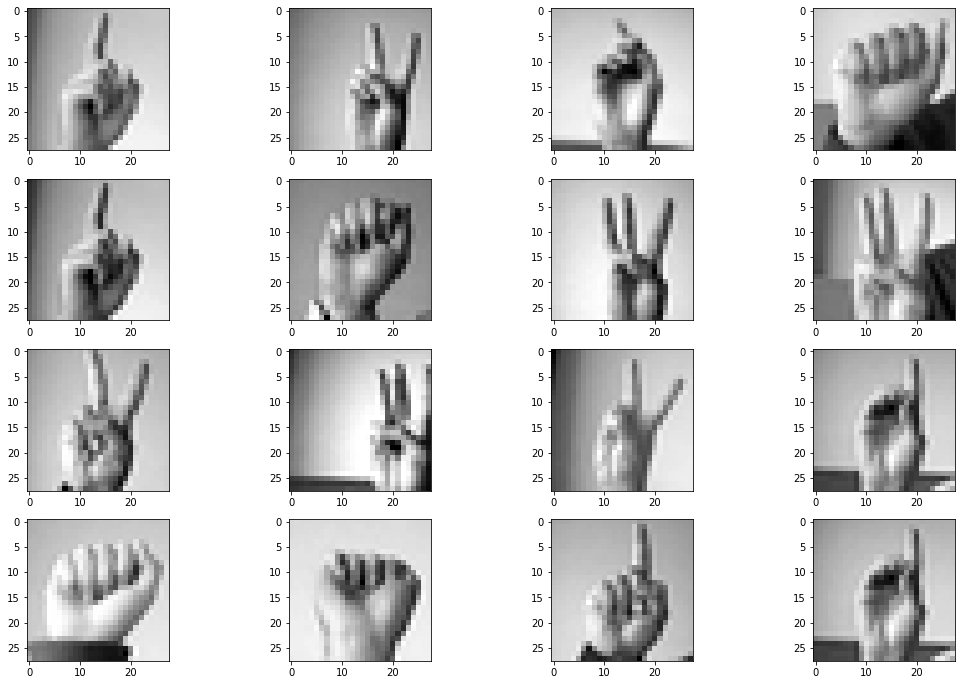

In [32]:
plt.figure(figsize=(18, 12))

_x_train = _train_set.iloc[:, 1:].values
_y_train = _train_set.iloc[:, 0].values

n = _x_train.shape[0]

for i in range(16):
    r = np.random.randint(n)
    
    plt.subplot(4, 4, i+1)
    plt.imshow(_x_train[r].reshape(28, 28), cmap="gray")
    print(_y_train[r])
    
plt.show()

In [33]:
n

4629